## 6.4 Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Hypothesis 1
##### - Check for extreme values
##### - Data prep for regression analysis
##### - Regression analysis
#### 4. Hypothesis 2
##### - Check for extreme values
##### - Data prep for regression analysis
##### - Regression analysis
#### 5. Reflections on the impact of possible data bias

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = r'C:\Desktop\Careerfoundry\2. Data Analytics Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\6.1 Sourcing Open Data'

In [4]:
df = pd.read_csv(os.path.join(path, '4. Cleaned Dateset with Python.csv'))

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City/Town
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore/Bothell
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish/Redmond


### 2 Data cleaning

#### 2.1 Consistency checks 
I am replacing values with 0 and 1 at 'sqft_basement' and 'yr_renovated' columns.
- sqft_basement: 0 = no basement, 1 = has basement
- yr_renovated: 0 = no renovation, 1 = has renovation

In [6]:
# Replace rows with sqft_basement values with 1
df.loc[df['sqft_basement'] != 0, 'sqft_basement'] = 1

In [7]:
df['sqft_basement'].value_counts()

sqft_basement
0    13126
1     8486
Name: count, dtype: int64

In [8]:
# Replace rows with yr_renovated values with 1
df.loc[df['yr_renovated'] != 0, 'yr_renovated'] = 1

In [9]:
df['yr_renovated'].value_counts()

yr_renovated
0    20698
1      914
Name: count, dtype: int64

In [10]:
df[['sqft_basement','yr_renovated']]

,sqft_basement,yr_renovated
0,0,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
21607,0,0
21608,0,0
21609,0,0
21610,0,0


#### 2.2 Check for missing values

In [11]:
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
City/Town        0
dtype: int64

No missing values found

#### 2.3 Drop unnecessary columns

In [12]:
df = df.drop(['Unnamed: 0', 'City/Town'], axis=1)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### 2.4 Check for duplicates

In [14]:
dups = df.duplicated()
dups.shape

(21612,)

No duplicates found

### 3. Hypothesis 1 
#### "Increasing the number of square feet (sqft_living) will lead to a higher house price" 

#### 3.1 Extreme values checks

Histogram showing distribution of price variable

C:\Users\boss4048\AppData\Local\Temp\ipykernel_38068\1384554536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values


<Axes: xlabel='price', ylabel='Density'>

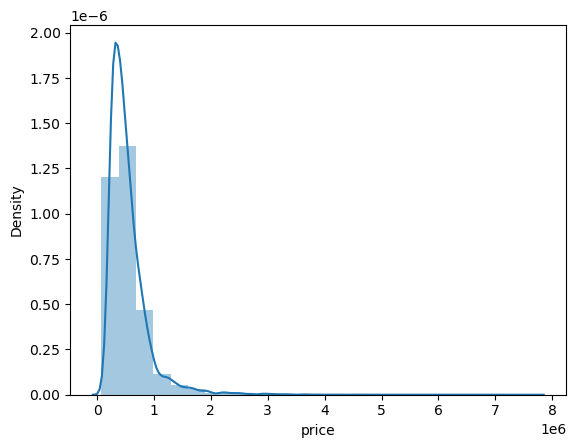

In [15]:
sns.distplot(df['price'], bins=25) # Shows extreme values

Histogram showing distribution of sqft_living variable

C:\Users\boss4048\AppData\Local\Temp\ipykernel_38068\574163313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'], bins=25) # Shows extreme values


<Axes: xlabel='sqft_living', ylabel='Density'>

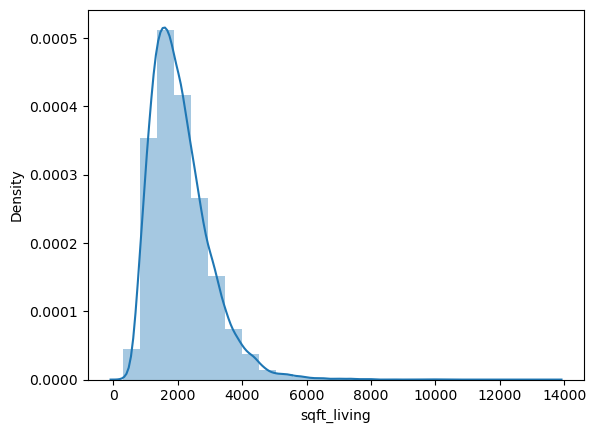

In [16]:
sns.distplot(df['sqft_living'], bins=25) # Shows extreme values

##### Finding outliers
Some of the outliers in the high values need to be removed.

##### Price variable

In [17]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
lower_bound

-162906.25

In [19]:
upper_bound

1129743.75

We can see that the prices more than 1,129,743.75 are outliers.

##### Sqft_living variable

In [20]:
# Calculate Q1, Q3, and IQR
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
lower_bound

-258.75

In [22]:
upper_bound

4235.25

We can see that the sqft_living more than 4,253.25 are outliers.

In [23]:
df_cleaned = df[(df['price'] < 1129743.75) & (df['sqft_living'] < 4235.25)]

In [24]:
df_cleaned.shape

(20279, 21)

#### 3.2 Data prep for regression analysis 

#### Chosen variables are
- Price (dependent variable) is plotted on y-axis.
- Sqft_living (independent variable) is plotted on x-axis.

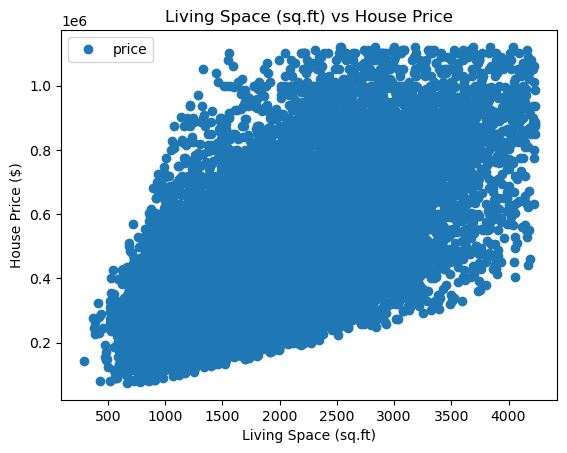

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cleaned.plot(x = 'sqft_living', y='price',style='o')
plt.title('Living Space (sq.ft) vs House Price')  
plt.xlabel('Living Space (sq.ft)')  
plt.ylabel('House Price ($)')  
plt.show()

#### 3.3 Regression analysis

##### 3.3.1 Reshape the variables

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_cleaned['sqft_living'].values.reshape(-1,1)
y1 = df_cleaned['price'].values.reshape(-1,1)

In [27]:
X1

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [28]:
y1

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]], dtype=int64)

##### 3.3.2 Split the data into a training set and a test set

In [29]:
# Split data into a training set and a test set.
# training set = 70%, test set = 30%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

##### 3.3.3 Start regression analysis

In [30]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.
regression.fit(X1_train, y1_train)

LinearRegression()

In [32]:
# Predict the values of y using X.
y1_predicted = regression.predict(X1_test)

##### Regression line on the test set

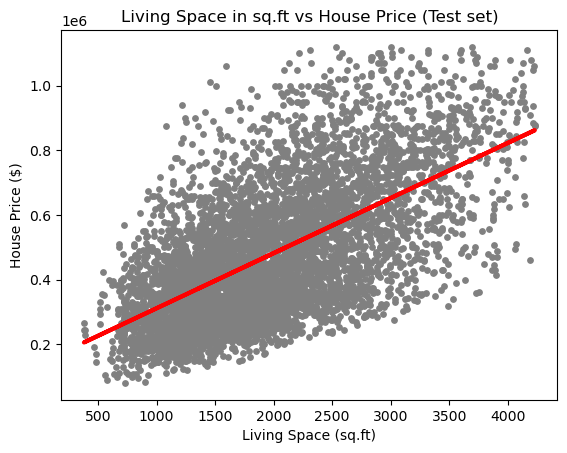

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Living Space in sq.ft vs House Price (Test set)')
plot_test.xlabel('Living Space (sq.ft)')
plot_test.ylabel('House Price ($)')
plot_test.show()

The red regression line from the test set clearly follows the hypothesis:
#### "Increasing the number of square feet (sqft_living) will lead to a higher house price."

It is evident that most house prices increase as the living space increases. However, there are some data points on the chart showing that even when the living space increases, the home price does not follow the trend.

To evaluate the accuracy of the model, it is important to assess its performance using more than just visual inspection of the chart. In this case, MSE (Mean Squared Error) and R² score values are useful metrics to employ.

##### 3.3.4 Check the model performance statistics (MSE and R2 score)

In [34]:
# Create objects that contain the model summary statistics.

# This is the mean squared error
rmse = mean_squared_error(y1_test, y1_predicted) 

# This is the R2 score. 
r2 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[170.49090601]]
Mean squared error:  26279471646.580242
R2 score:  0.3837514452734949


##### From the statistical metrics we calculated:

1. The positive slope confirms our previous analysis that as living space increases, the house price tends to go higher.
2. An R2 score of 0.38 indicates a weak to moderate relationship, as we can observe many data points scattered around the regression line on the chart.

##### 3.3.5 Compare the predicted y values with the actual y values

In [36]:
y1_predicted

array([[374925.65181505],
       [601678.55681105],
       [362991.28839421],
       ...,
       [690333.8279373 ],
       [390269.83335614],
       [649416.01049442]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})

# Prevent large numbers from displaying in scientific format
pd.options.display.float_format = '{:,.0f}'.format

In [38]:
data

,Actual,Predicted
0,479000,"374,926"
1,565000,"601,679"
2,337500,"362,991"
3,210000,"410,729"
4,879000,"862,530"
...,...,...
6079,521000,"455,056"
6080,170000,"371,516"
6081,748000,"690,334"
6082,290000,"390,270"


##### 3.3.6 Insights to the hypothesis 1 (price vs sqft_living)

The positive slope of the red regression line clearly indicates that the relationship between house price and living space moves in the same direction, meaning that as the living space increases, the house price increases.

However, after splitting the data into training and test sets, we can see some noticeable differences between the actual and predicted y values. To determine if I can trust the model we just created, I want to perform some statistical calculations to see how much the predicted y values deviate from the actual values. If the results fall within an acceptable percentage, I would be more confident in trusting the model.

Below are the steps I plan to take to calculate the statistical values.

In [39]:
# Calculate the difference values between actual and predicted values and make it in absolute format
data['different value'] = abs(data['Actual'] - data['Predicted'])

In [40]:
data.head()

,Actual,Predicted,different value
0,479000,"374,926","104,074"
1,565000,"601,679","36,679"
2,337500,"362,991","25,491"
3,210000,"410,729","200,729"
4,879000,"862,530","16,470"


In [41]:
# Calculate the average value from the entire data of the different value column
data['different value'].mean()

130291.09381057779

In [42]:
# Calculate the average value from the entire data of the Actual column
data['Actual'].mean()

473919.58711374097

In [43]:
data['different value'].mean()/data['Actual'].mean()

0.27492236521405444

We can see that there is a significant gap of approximately 27.5% (average value). This result deviates considerably from the actual values. Based on this number, I would not feel confident trusting this model. If I could reduce the error gap to at 10% and less, I would feel more confident in trusting the model. Therefore, our next step would be to further develop the model to decrease the error, ensuring users feel confident using it for predictions.

### 4. Hypothesis 2
#### "Houses with a newer year built (after 1980) are more likely to have higher house prices"

#### 4.1 Extreme values checks

Histogram showing distribution of yr_built variable

C:\Users\boss4048\AppData\Local\Temp\ipykernel_38068\4009164569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yr_built'], bins=25) # Shows extreme values


<Axes: xlabel='yr_built', ylabel='Density'>

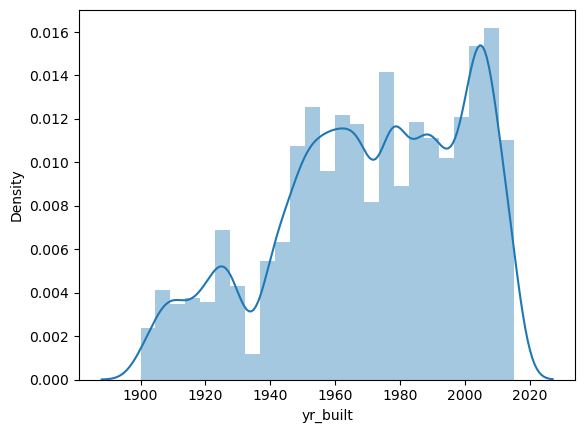

In [44]:
sns.distplot(df['yr_built'], bins=25) # Shows extreme values

##### Finding outliers
Some of the outliers in the high values need to be removed.

##### Year built variable

In [45]:
# Calculate Q1, Q3, and IQR
Q1 = df['yr_built'].quantile(0.25)
Q3 = df['yr_built'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
lower_bound

1882.0

In [47]:
upper_bound

2066.0

There are no outliers on this variable, so we can use the same dataframe (df_cleaned) from the previous analysis.

#### 4.2 Data prep for regression analysis 

#### Chosen variables are
- Price (dependent variable) is plotted on y-axis.
- Yr_built (independent variable) is plotted on x-axis.

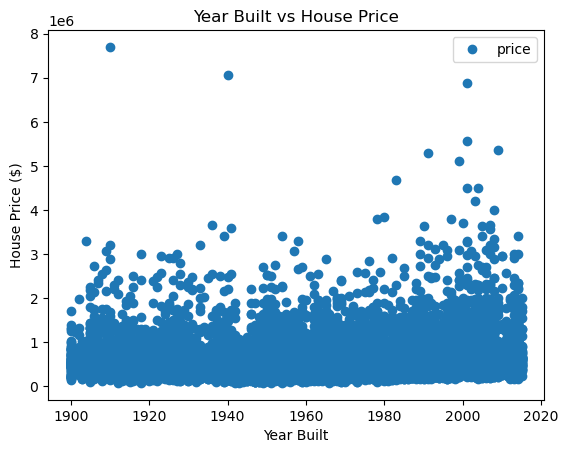

In [48]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'yr_built', y='price',style='o')
plt.title('Year Built vs House Price')  
plt.xlabel('Year Built')  
plt.ylabel('House Price ($)')  
plt.show()

#### 4.3 Regression analysis

##### 4.3.1 Reshape the variables

In [49]:
# Split the data into subsets for yr_built <= 1980  and > 1980
old_house = df_cleaned[df_cleaned['yr_built'] <= 1980]
new_house = df_cleaned[df_cleaned['yr_built'] > 1980]

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

# yr_built <= 1980
X_old = old_house['yr_built'].values.reshape(-1,1)
y_old = old_house['price'].values.reshape(-1,1)

# yr_built > 1980
X_new = new_house['yr_built'].values.reshape(-1,1)
y_new = new_house['price'].values.reshape(-1,1)

In [51]:
X_old

array([[1955],
       [1951],
       [1933],
       ...,
       [1953],
       [1943],
       [1943]], dtype=int64)

In [52]:
y_old

array([[221900],
       [538000],
       [180000],
       ...,
       [332220],
       [249000],
       [399950]], dtype=int64)

In [53]:
X_new

array([[1987],
       [1995],
       [2003],
       ...,
       [2009],
       [2004],
       [2008]], dtype=int64)

In [54]:
y_new

array([[510000],
       [257500],
       [323000],
       ...,
       [402101],
       [400000],
       [325000]], dtype=int64)

##### 4.3.2 Split the data into a training set and a test set

In [55]:
# Split data into a training set and a test set.
# training set = 70%, test set = 30%

# yr_built <= 1980
X_old_train, X_old_test, y_old_train, y_old_test = train_test_split(X_old, y_old, test_size=0.3, random_state=0)

# yr_built > 1980
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

##### 4.3.3 Start regression analysis

In [56]:
# Create a regression object.
regression_old = LinearRegression()  # This is the regression object, which will be fit onto the training set.
regression_new = LinearRegression()

In [57]:
# Fit the regression object onto the training set.

# yr_built <= 1980
regression_old.fit(X_old_train, y_old_train)

# yr_built > 1980
regression_new.fit(X_new_train, y_new_train)

LinearRegression()

In [58]:
# Predict the values of y using X.

# yr_built <= 1980
y_old_predicted = regression_old.predict(X_old_test)

# yr_built > 1980
y_new_predicted = regression_new.predict(X_new_test)

##### Regression line on the test set

##### Old houses: year built <= 1980

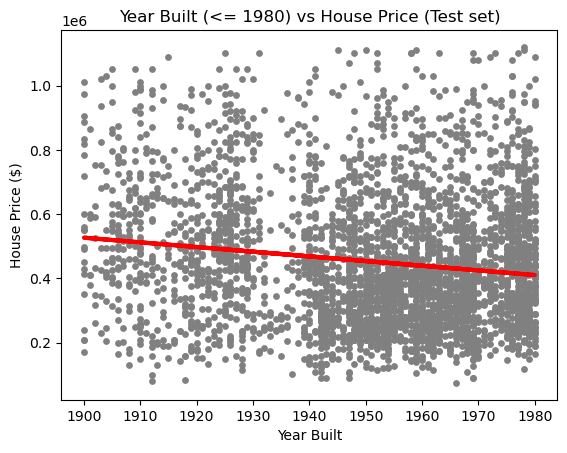

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_old_test, y_old_test, color='gray', s = 15)
plot_test.plot(X_old_test, y_old_predicted, color='red', linewidth =3)
plot_test.title('Year Built (<= 1980) vs House Price (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('House Price ($)')
plot_test.show()

##### New houses: year built > 1980

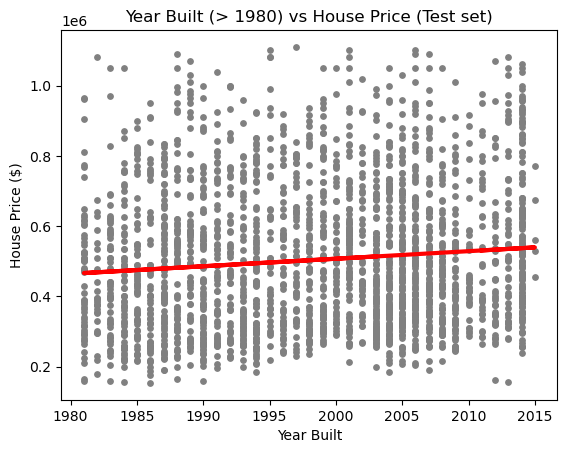

In [60]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_new_test, y_new_test, color='gray', s = 15)
plot_test.plot(X_new_test, y_new_predicted, color='red', linewidth =3)
plot_test.title('Year Built (> 1980) vs House Price (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('House Price ($)')
plot_test.show()

##### Comparing the two charts above:

1. The red regression line for houses built in or before 1980 has a negative slope, indicating that house prices decrease as the year built becomes older (lower year).
2. In contrast, the red regression line for houses built after 1980 has a positive slope, suggesting that house prices increase as the year built becomes newer (higher year).
3. However, we can observe that data points are widely scattered around the regression lines in both charts. This indicates a weak relationship between the two variables in each case.

To properly evaluate the model's accuracy, relying solely on visual inspection is insufficient. It is essential to assess its performance using statistical metrics such as Mean Squared Error (MSE) and R² score for a more precise analysis.

##### 4.3.4 Check the model performance statistics (MSE and R2 score)

##### Year built <= 1980

In [61]:
# Create objects that contain the model summary statistics.

# This is the mean squared error
rmse_old = mean_squared_error(y_old_test, y_old_predicted) 

# This is the R2 score. 
r2_old = r2_score(y_old_test, y_old_predicted) # This is the R2 score. 

In [62]:
print('Slope:' ,regression_old.coef_)
print('Mean squared error: ', rmse_old)
print('R2 score: ', r2_old)

Slope: [[-1454.75715616]]
Mean squared error:  42272505144.45635
R2 score:  0.020638227126639652


##### Year built > 1980

In [63]:
# Create objects that contain the model summary statistics.

# This is the mean squared error
rmse_new = mean_squared_error(y_new_test, y_new_predicted) 

# This is the R2 score. 
r2_new = r2_score(y_new_test, y_new_predicted) # This is the R2 score. 

In [64]:
print('Slope:' ,regression_new.coef_)
print('Mean squared error: ', rmse_new)
print('R2 score: ', r2_new)

Slope: [[2148.73805838]]
Mean squared error:  40290431267.14182
R2 score:  0.00940115036892708


We can see that the R2 scores on both charts are very low and not close to 1, indicating a very weak relationship between the two variables in each chart. Additionally, when comparing the slope values of both charts:

1. Houses with a year built ≤ 1980 have negative slope values, meaning that as the year decreases (older houses), the house price increases.
2. Houses with a year built > 1980 have positive slope values, meaning that as the year increases (newer houses), the house price increases.

These observations support our earlier analysis before calculating these statistical metrics. 

##### 4.3.5 Compare the predicted y values with the actual y values

##### Year built <= 1980

In [65]:
y_old_predicted

array([[429289.11776082],
       [448200.96079093],
       [417651.06051152],
       ...,
       [436562.90354163],
       [464203.28950872],
       [490388.91831964]])

In [66]:
# Create a dataframe comparing the actual and predicted values of y.
data_old_house = pd.DataFrame({'Actual': y_old_test.flatten(), 'Predicted': y_old_predicted.flatten()})

# Prevent large numbers from displaying in scientific format
pd.options.display.float_format = '{:,.0f}'.format

In [67]:
data_old_house

,Actual,Predicted
0,358000,"429,289"
1,950000,"448,201"
2,183500,"417,651"
3,1000000,"411,832"
4,475000,"413,287"
...,...,...
3592,371000,"411,832"
3593,935000,"522,394"
3594,160000,"436,563"
3595,375000,"464,203"


In [68]:
# Calculate the difference values between actual and predicted values and make it in absolute format
data_old_house['different value'] = abs(data_old_house['Actual'] - data_old_house['Predicted'])

In [69]:
data_old_house.head()

,Actual,Predicted,different value
0,358000,"429,289","71,289"
1,950000,"448,201","501,799"
2,183500,"417,651","234,151"
3,1000000,"411,832","588,168"
4,475000,"413,287","61,713"


In [70]:
# Calculate the average value from the entire data of the different value column
data_old_house['different value'].mean()

163994.1747515336

In [71]:
# Calculate the average value from the entire data of the Actual column
data_old_house['Actual'].mean()

450312.05921601335

In [72]:
data_old_house['different value'].mean()/data_old_house['Actual'].mean()

0.3641789541169407

Year built <= 1980 has the error gap approximately 36.4% (average value).

##### Year built > 1980

In [73]:
y_new_predicted

array([[513513.50857239],
       [504918.55633886],
       [502769.81828048],
       ...,
       [500621.0802221 ],
       [522108.46080592],
       [530703.41303945]])

In [74]:
# Create a dataframe comparing the actual and predicted values of y.
data_new_house = pd.DataFrame({'Actual': y_new_test.flatten(), 'Predicted': y_new_predicted.flatten()})

# Prevent large numbers from displaying in scientific format
pd.options.display.float_format = '{:,.0f}'.format

In [75]:
data_new_house

,Actual,Predicted
0,449950,"513,514"
1,961500,"504,919"
2,393000,"502,770"
3,500000,"479,134"
4,324500,"476,985"
...,...,...
2482,475000,"489,877"
2483,499000,"524,257"
2484,328000,"500,621"
2485,525000,"522,108"


In [76]:
# Calculate the difference values between actual and predicted values and make it in absolute format
data_new_house['different value'] = abs(data_new_house['Actual'] - data_new_house['Predicted'])

In [77]:
data_new_house.head()

,Actual,Predicted,different value
0,449950,"513,514","63,564"
1,961500,"504,919","456,581"
2,393000,"502,770","109,770"
3,500000,"479,134","20,866"
4,324500,"476,985","152,485"


In [78]:
# Calculate the average value from the entire data of the different value column
data_new_house['different value'].mean()

165469.93602639565

In [79]:
# Calculate the average value from the entire data of the Actual column
data_new_house['Actual'].mean()

503886.3558504222

In [80]:
data_new_house['different value'].mean()/data_new_house['Actual'].mean()

0.3283874113779638

Year built > 1980 has the error gap approximately 32.8% (average value).

##### 4.3.6 Insights to the hypothesis 2 (price vs yr_built)

As the hypothesis states, "Houses with a newer year built (after 1980) are more likely to have higher house prices."

##### From the analysis, 
1. It indicates that houses built after 1980 (newer houses) are more likely to be more expensive (prices increase), but the relationship is not very strong.
2. On the other hand, houses built before or in 1980 (older houses) are more likely to be less expensive (prices decrease), but again, the relationship is not very strong.

##### However, after splitting the data into training and test sets, we can see some noticeable differences between the actual and predicted y values:

1. Houses built before or in 1980 have a significant error gap of approximately 36.4%.
2. Houses built after 1980 have a significant error gap of approximately 32.8%.

Both groups have large error gaps, with houses built after 1980 having a slightly smaller error. However, I still do not feel confident in trusting this model. 

Similar to the first hypothesis, if I could reduce the error gap to 10% or less, I would feel more confident in trusting the model. Therefore, our next step would be to further develop the model to decrease the error, ensuring users feel confident using it for predictions.

### 5. Reflections on the impact of possible data bias

The dataset spans from 2014 to part of 2015, which introduces temporal bias due to the data being nearly a decade old. As a result, the trends, behaviors, and conditions captured may no longer accurately reflect the current landscape, potentially undermining the relevance and validity of the insights derived from the data.

Additionally, a class imbalance bias may arise in the analysis of Hypothesis 2, where the data is divided into two groups based on the year of construction:

Houses built in or before 1980, with 12,573 records.
Houses built after 1980, with only 9,039 records.
This disparity in the size of the groups (a 25% difference) may lead to a class imbalance. In such cases, models can become biased toward the larger group, which could result in inaccurate predictions for the smaller group. The model might overly emphasize patterns in the majority class, reducing its ability to generalize effectively and leading to a skewed understanding of the minority class.